In [1]:
# libraries 
import os  
import numpy as np 
import seaborn as sns 
import cv2 
import matplotlib.pyplot as plt 
import time 
from tqdm import tqdm

In [2]:
labels = ['glioma','meningioma','notumor','pituitary']    

X_train = []
y_train = []
image_size = 299

for i in labels:
    folderPath = os.path.join('./DataSet_2','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('./DataSet_2','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 285.98it/s]


In [3]:
print(X_train.shape) 
print(y_train.shape)

(3264, 299, 299, 3)
(3264,)


In [4]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [6]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2611, 299, 299, 3)
(653, 299, 299, 3)
(2611,)
(653,)


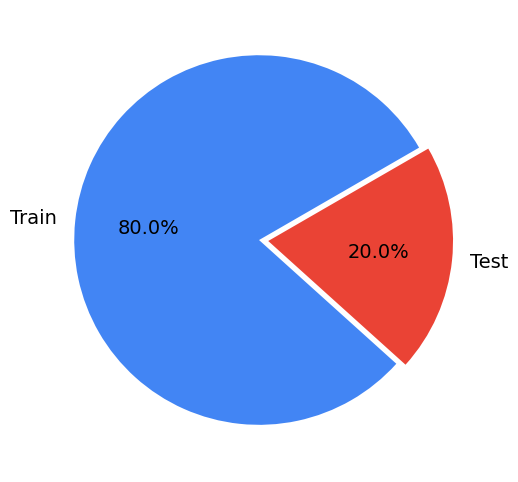

In [8]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(y_train), len(y_test)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

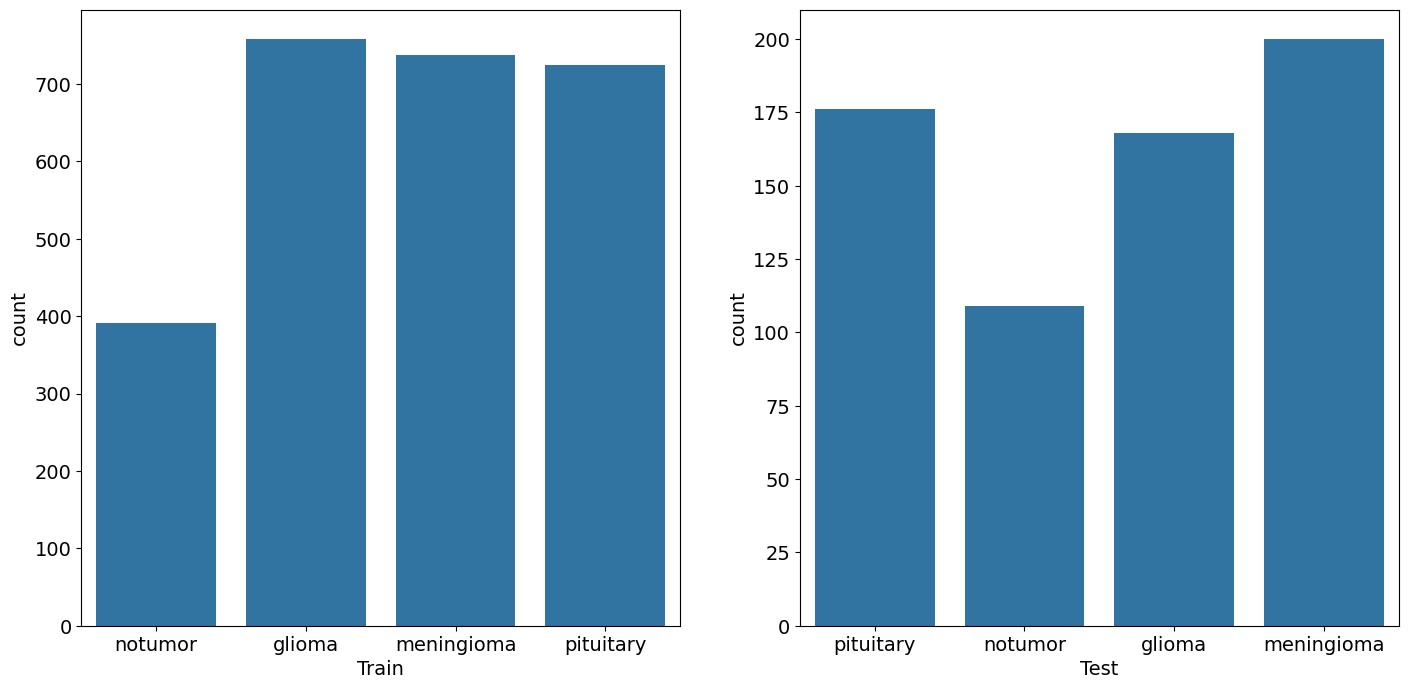

In [9]:
# Before augmentation
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([y_train, y_test]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

## ----------------------------------

In [7]:
# convert into 2-D array
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [8]:
print(X_train_reshaped.shape) 
print(X_test_reshaped.shape)

(2611, 268203)
(653, 268203)


In [9]:
X_train_normalized = X_train_reshaped / 255.0
X_test_normalized = X_test_reshaped / 255.0

In [10]:
# Checking before using
print(f"Maximum and Minimum pixel value: {X_train_normalized.max()} - {X_train_normalized.min()}")  
print(f"Maximum and Minimum pixel value: {X_test_normalized.max()} - {X_test_normalized.min()}") 

Maximum and Minimum pixel value: 1.0 - 0.0
Maximum and Minimum pixel value: 1.0 - 0.0


In [11]:
print("x_train shape",X_train_normalized.shape)
print("x_test shape",X_test_normalized.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2611, 268203)
x_test shape (653, 268203)
y_train shape (2611,)
y_test shape (653,)


In [12]:
#Libraries 

#ML classifiers
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

# Performance metrics
from sklearn.metrics import confusion_matrix, classification_report

## --------------------------------------------------

In [16]:
starting_time = time.time()  
# Train SVM classifier
svm_classifier = SVC(kernel='linear') # should I use different kernel ??? such as linear, sigmoid, and radial basis
svm_classifier.fit(X_train_normalized, y_train)

# Evaluate SVM classifier
accuracy_Linear = svm_classifier.score(X_test_normalized, y_test)
print("Accuracy of Linear:", accuracy_Linear)   

ending_time = time.time()  
  
total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of Linear: 0.8223583460949464
Total runtime of model: 12.661172608534494 Min.


In [17]:

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for SVM_Linear:")
print(report)

Classification Report for SVM_Linear:
              precision    recall  f1-score   support

      glioma       0.71      0.81      0.76       168
  meningioma       0.79      0.79      0.79       200
     notumor       0.92      0.66      0.77       109
   pituitary       0.93      0.97      0.95       176

    accuracy                           0.82       653
   macro avg       0.84      0.81      0.82       653
weighted avg       0.83      0.82      0.82       653



In [18]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Linear:")
print(cm)

Confusion Matrix for SVM/Linear:
[[136  24   5   3]
 [ 37 158   1   4]
 [ 16  15  72   6]
 [  3   2   0 171]]


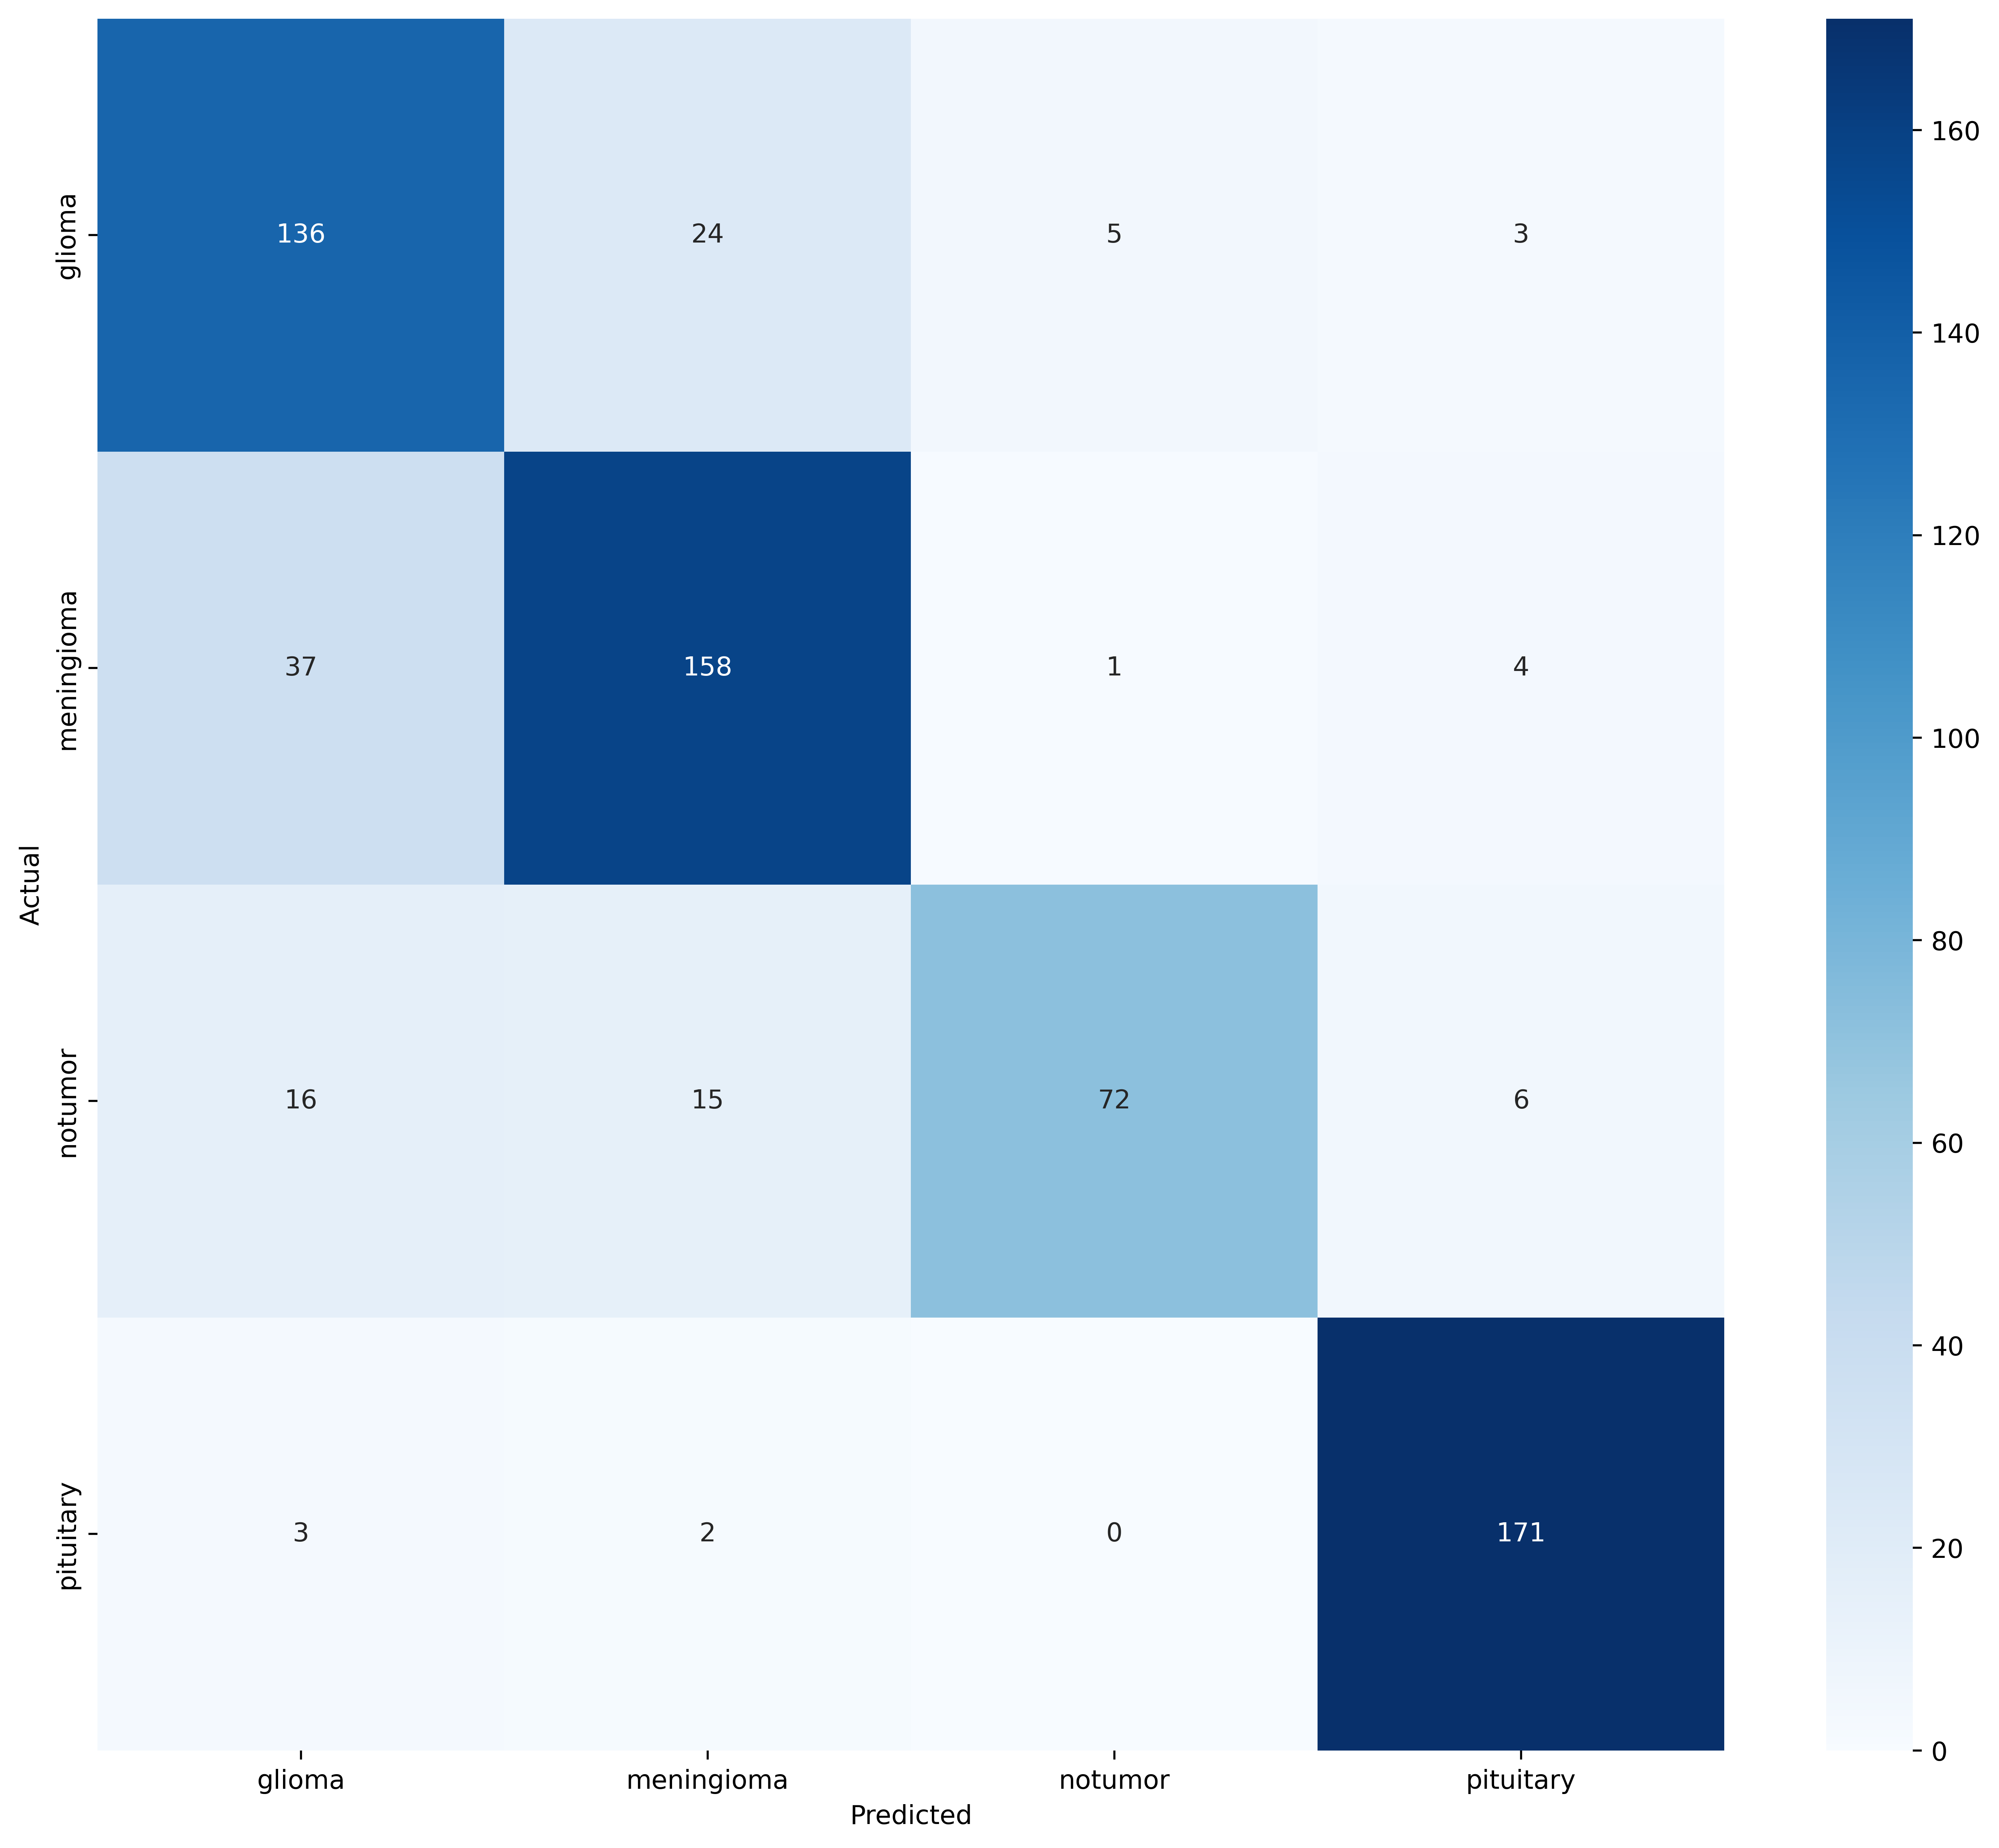

In [13]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[136 , 24, 5,  3],
                              [ 37, 158, 1, 4],
                              [ 16, 15, 72, 6],
                              [  3,   2,   0, 171]])


# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

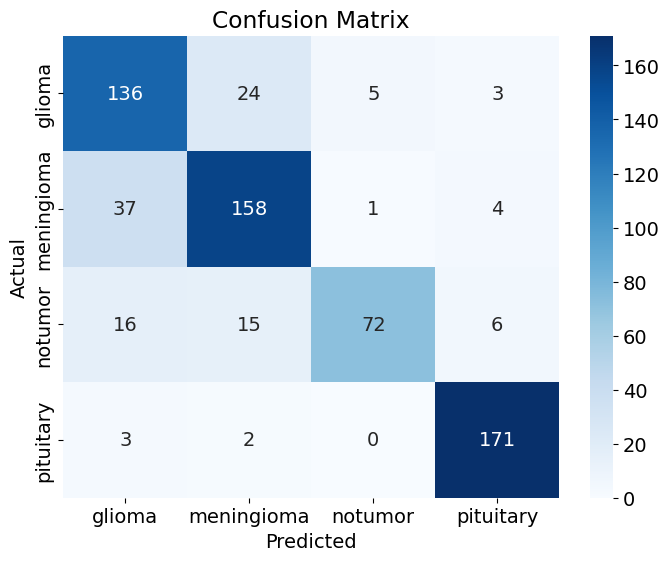

In [19]:
labels = ['glioma','meningioma','notumor','pituitary'] 
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## --------------------------------------------------

In [20]:
starting_time = time.time()   

# Train SVM classifier
svm_classifier = SVC(kernel='sigmoid') # should I use different kernel ??? such as linear, sigmoid, and radial basis
svm_classifier.fit(X_train_normalized, y_train)

# Evaluate SVM classifier
accuracy_Sigmoid = svm_classifier.score(X_test_normalized, y_test)
print("Accuracy of Sigmoid:", accuracy_Sigmoid)  

ending_time = time.time()    

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of Sigmoid: 0.3093415007656968
Total runtime of model: 13.429853940010071 Min.


In [21]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for SVM_Sigmoid:")
print(report)

Classification Report for SVM_Sigmoid:
              precision    recall  f1-score   support

      glioma       0.27      0.61      0.37       168
  meningioma       0.50      0.01      0.03       200
     notumor       0.15      0.23      0.18       109
   pituitary       0.79      0.40      0.53       176

    accuracy                           0.31       653
   macro avg       0.43      0.32      0.28       653
weighted avg       0.46      0.31      0.28       653



In [22]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[103   3  57   5]
 [154   3  32  11]
 [ 81   0  25   3]
 [ 49   0  56  71]]


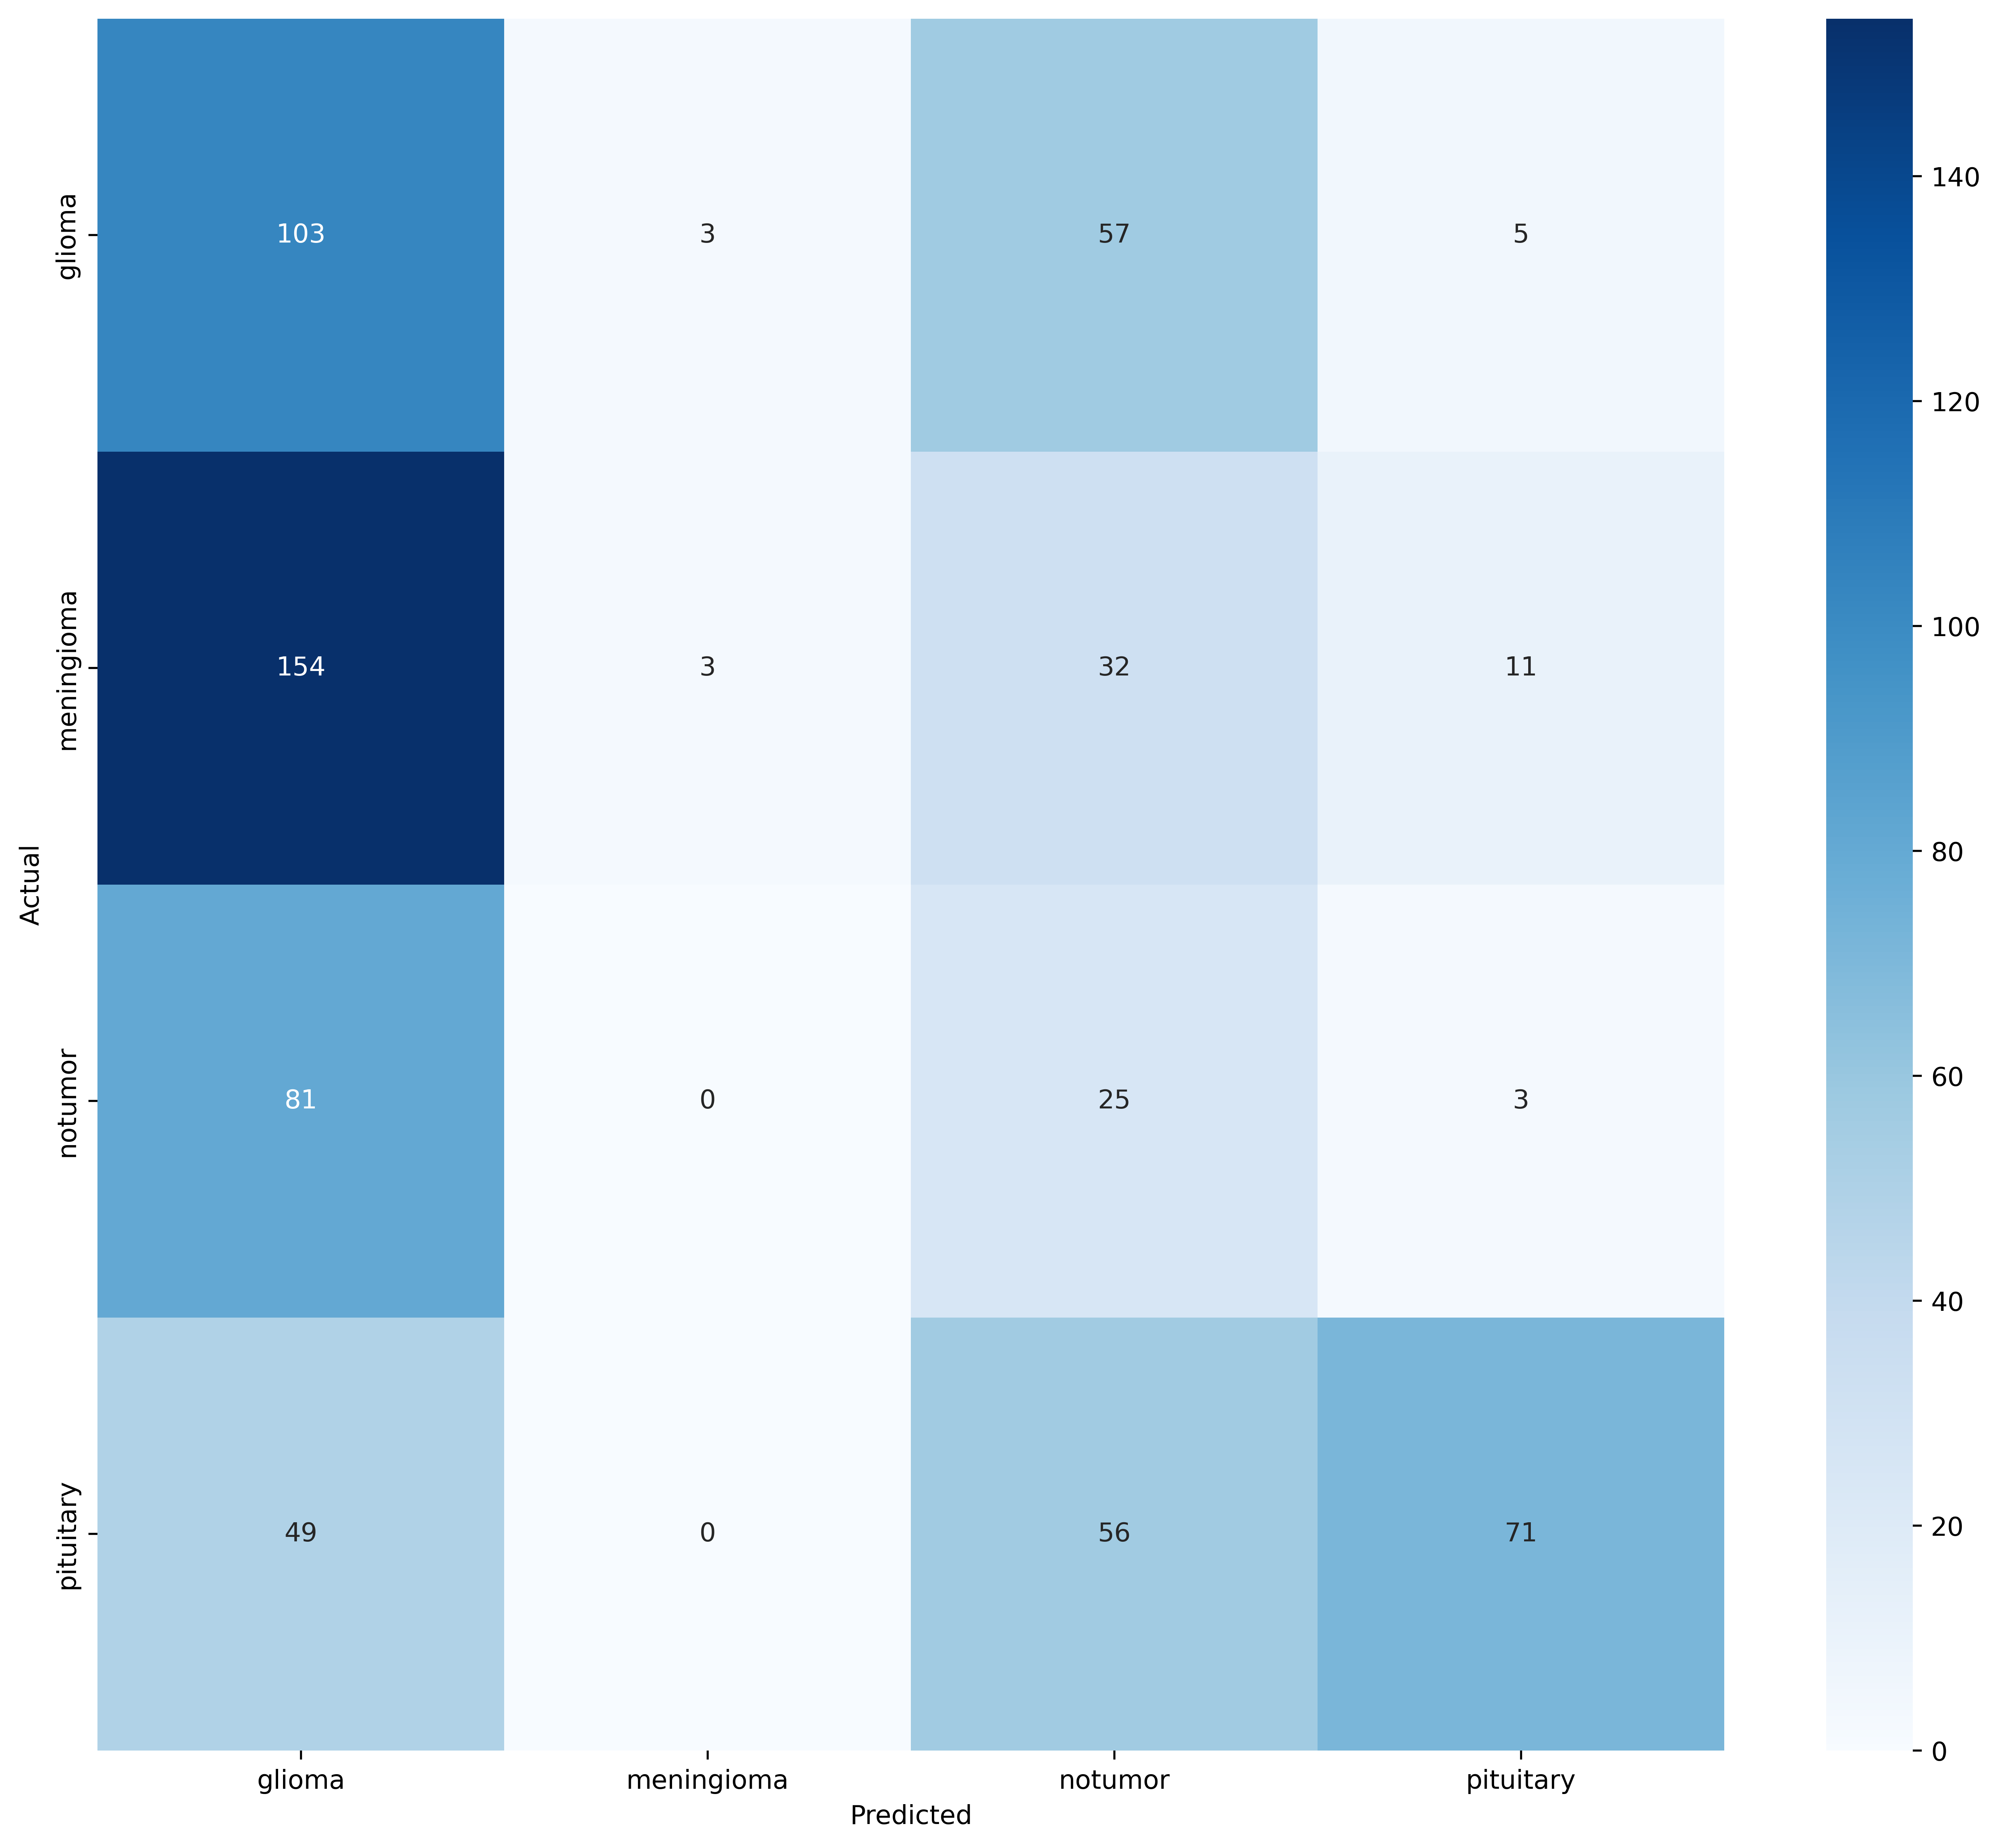

In [14]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[103 , 3, 57,  5],
                              [ 154, 3, 32, 11],
                              [ 81, 0, 25, 3],
                              [ 49, 0,  56, 71]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

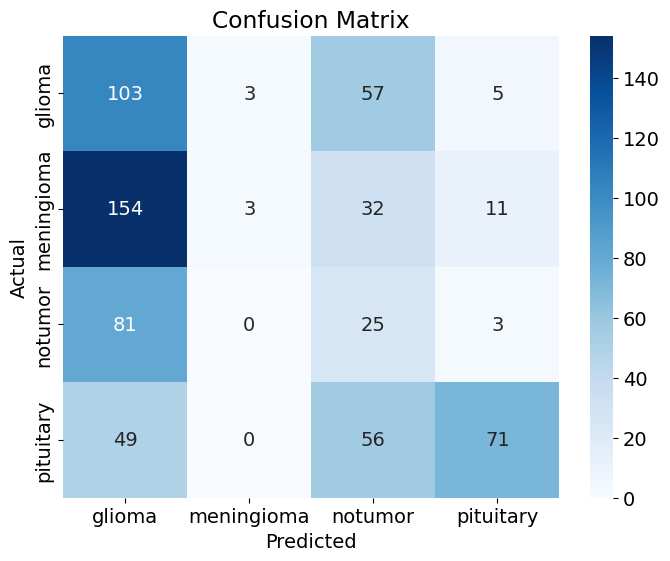

In [23]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## --------------------------------------------------

In [24]:
starting_time = time.time()   
# Train SVM classifier
svm_classifier = SVC(kernel='rbf') 
svm_classifier.fit(X_train_normalized, y_train)

# Evaluate SVM classifier
accuracy_Rbf= svm_classifier.score(X_test_normalized, y_test)
print("Accuracy of Rbf:", accuracy_Rbf)   

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min") 

Accuracy of Rbf: 0.8468606431852986
Total runtime of model: 22.92846023241679 Min


In [25]:
# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for SVM_RBF:")
print(report)

Classification Report for SVM_RBF:
              precision    recall  f1-score   support

      glioma       0.79      0.82      0.81       168
  meningioma       0.84      0.82      0.83       200
     notumor       0.92      0.72      0.81       109
   pituitary       0.87      0.97      0.92       176

    accuracy                           0.85       653
   macro avg       0.86      0.84      0.84       653
weighted avg       0.85      0.85      0.85       653



In [26]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[138  21   5   4]
 [ 20 165   2  13]
 [ 12  10  79   8]
 [  4   1   0 171]]


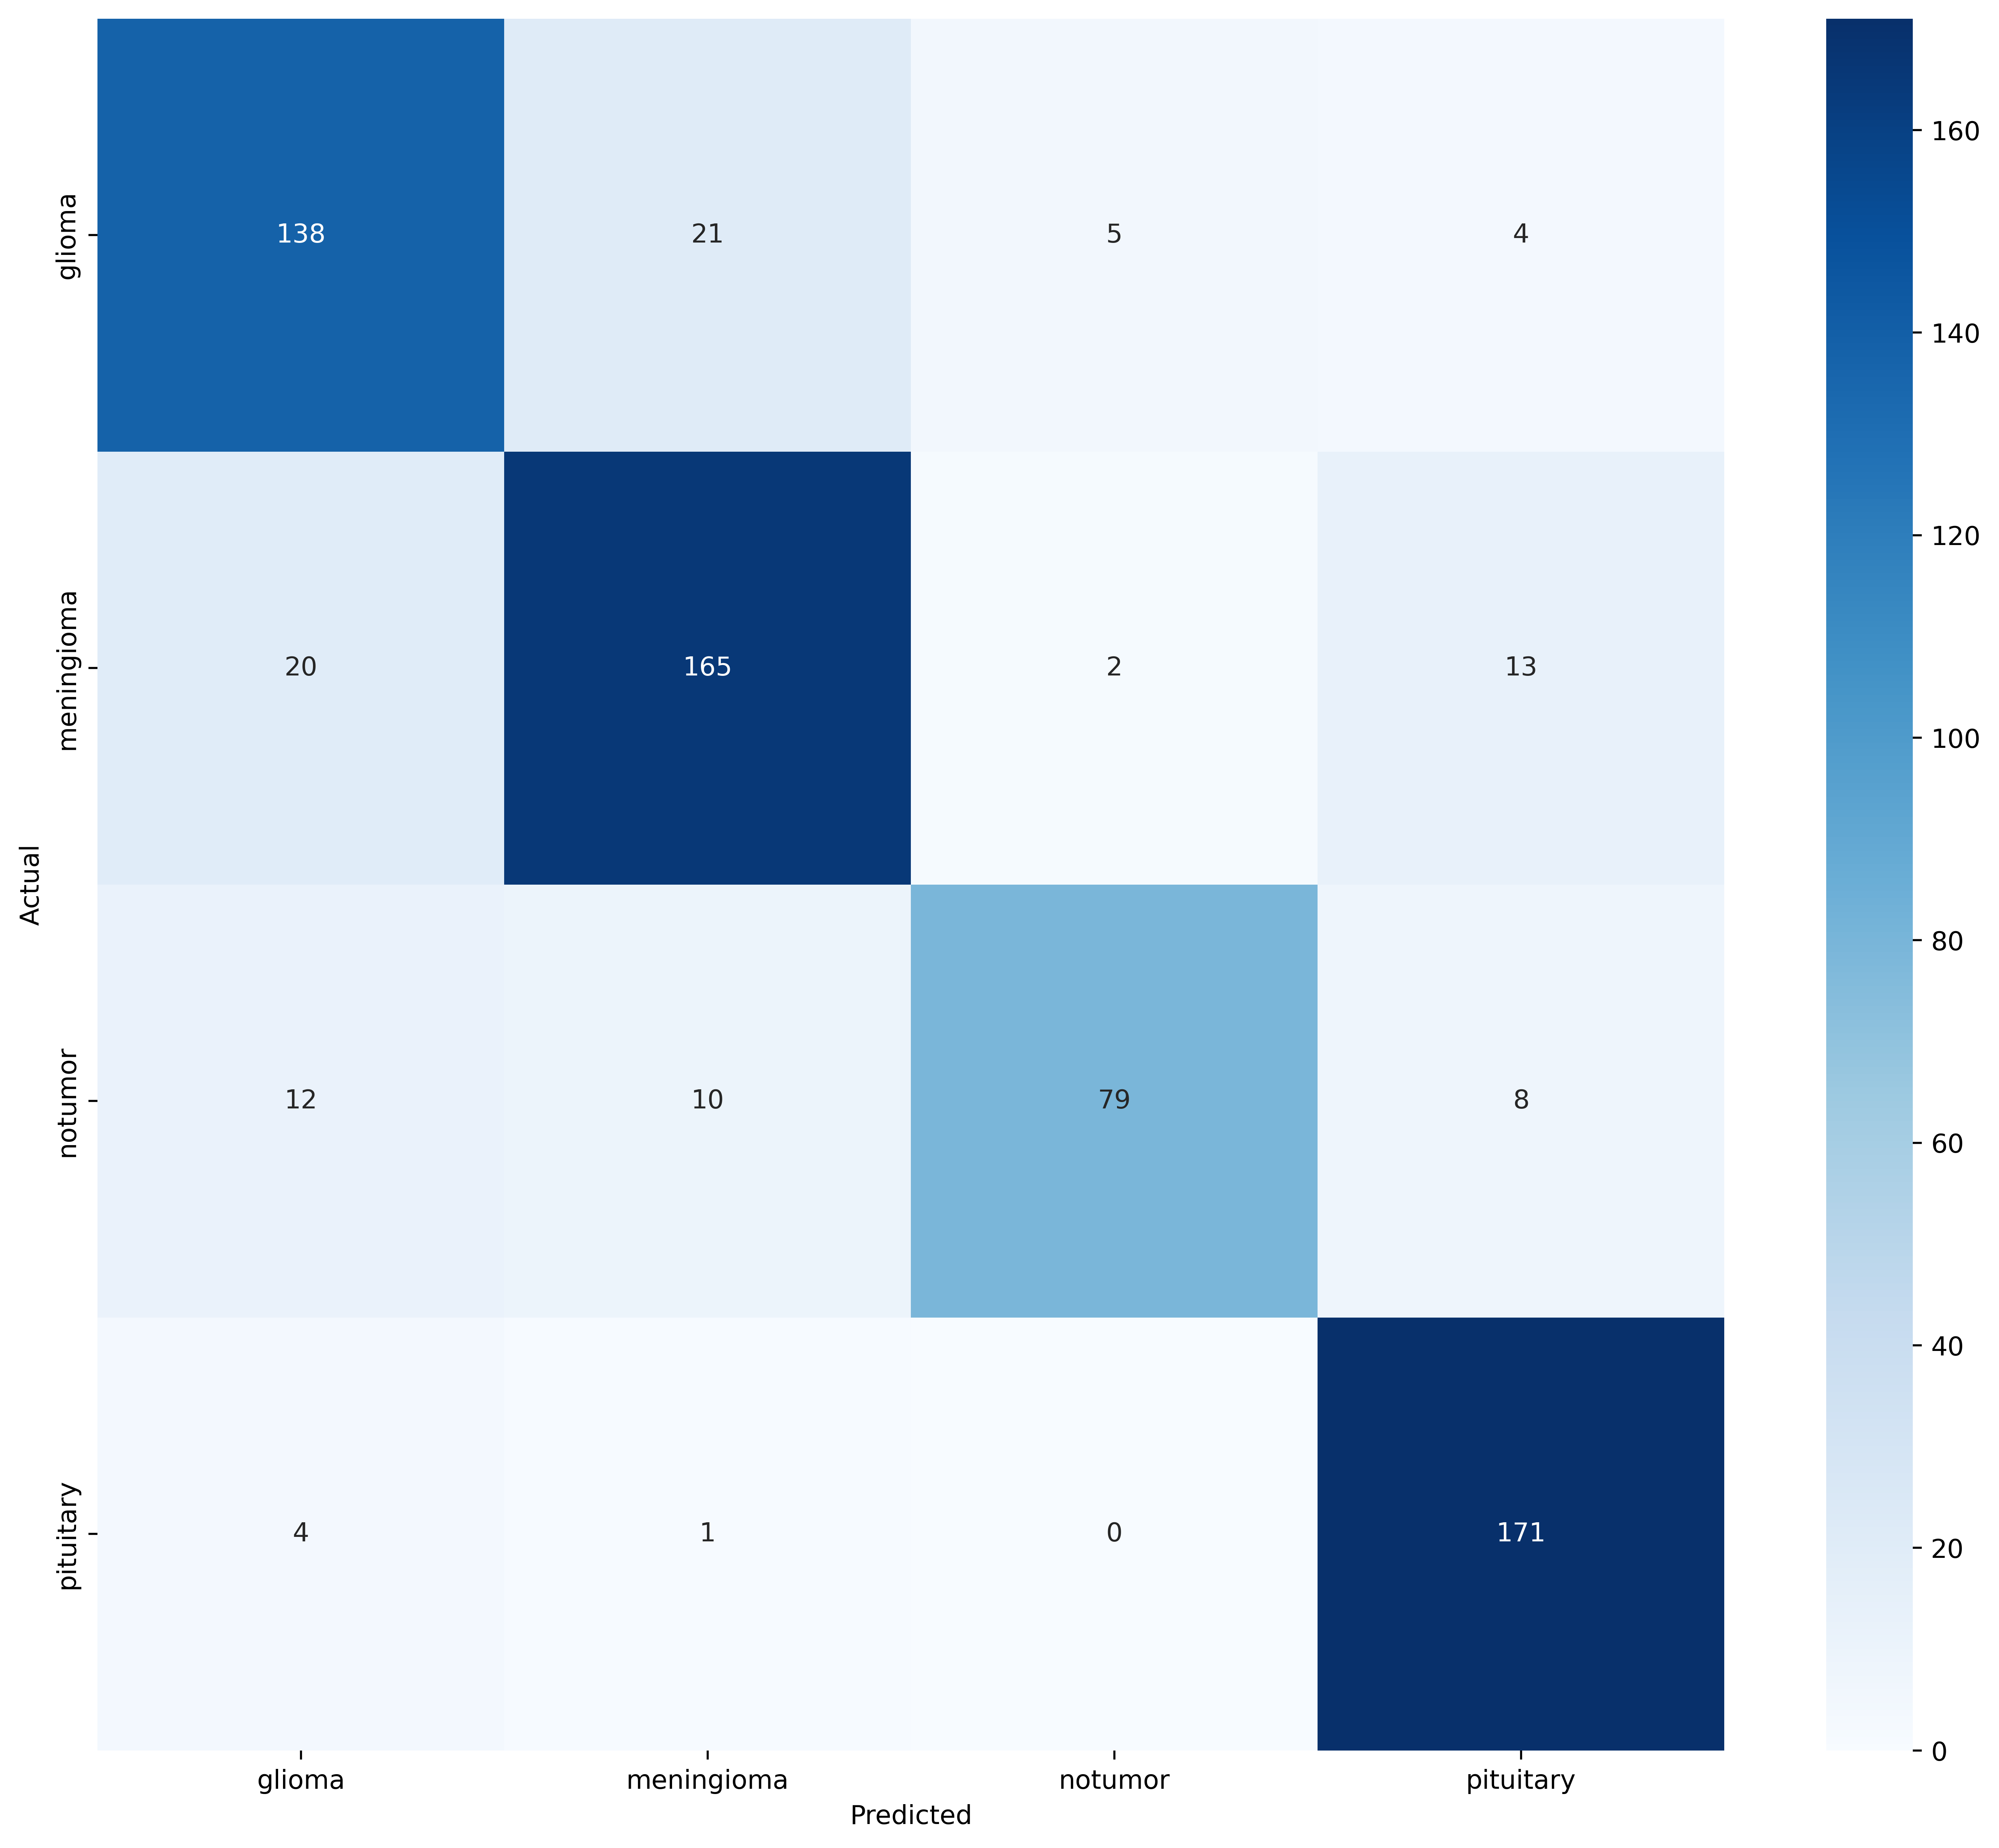

In [17]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[138 , 21, 5,  4],
                              [ 20, 165, 2, 13],
                              [ 12, 10, 79, 8],
                              [  4,  1,  0, 171]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

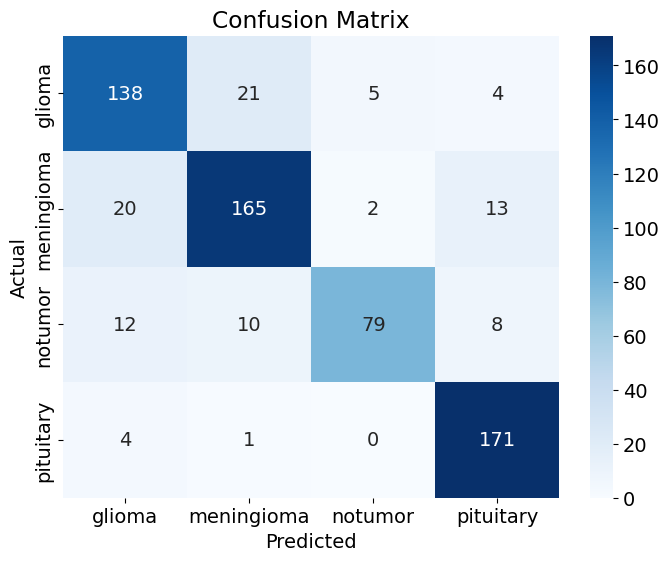

In [27]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## -------------------------------------------------------------

In [28]:
starting_time = time.time()   

random_forest_classifier = RandomForestClassifier(n_estimators=500, max_depth=500)  
random_forest_classifier.fit(X_train_normalized, y_train)

# Evaluate Random Forest classifier
accuracy_RF = random_forest_classifier.score(X_test_normalized, y_test)
print("Accuracy of RF:", accuracy_RF)   

ending_time = time.time()   

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of RF: 0.9065849923430321
Total runtime of model: 3.5000556389490765 Min.


In [29]:
# Predict the labels for the test set
y_pred = random_forest_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.97      0.85      0.91       168
  meningioma       0.86      0.91      0.88       200
     notumor       0.92      0.90      0.91       109
   pituitary       0.90      0.97      0.93       176

    accuracy                           0.91       653
   macro avg       0.91      0.91      0.91       653
weighted avg       0.91      0.91      0.91       653



In [30]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[143  15   5   5]
 [  5 181   1  13]
 [  0  10  98   1]
 [  0   4   2 170]]


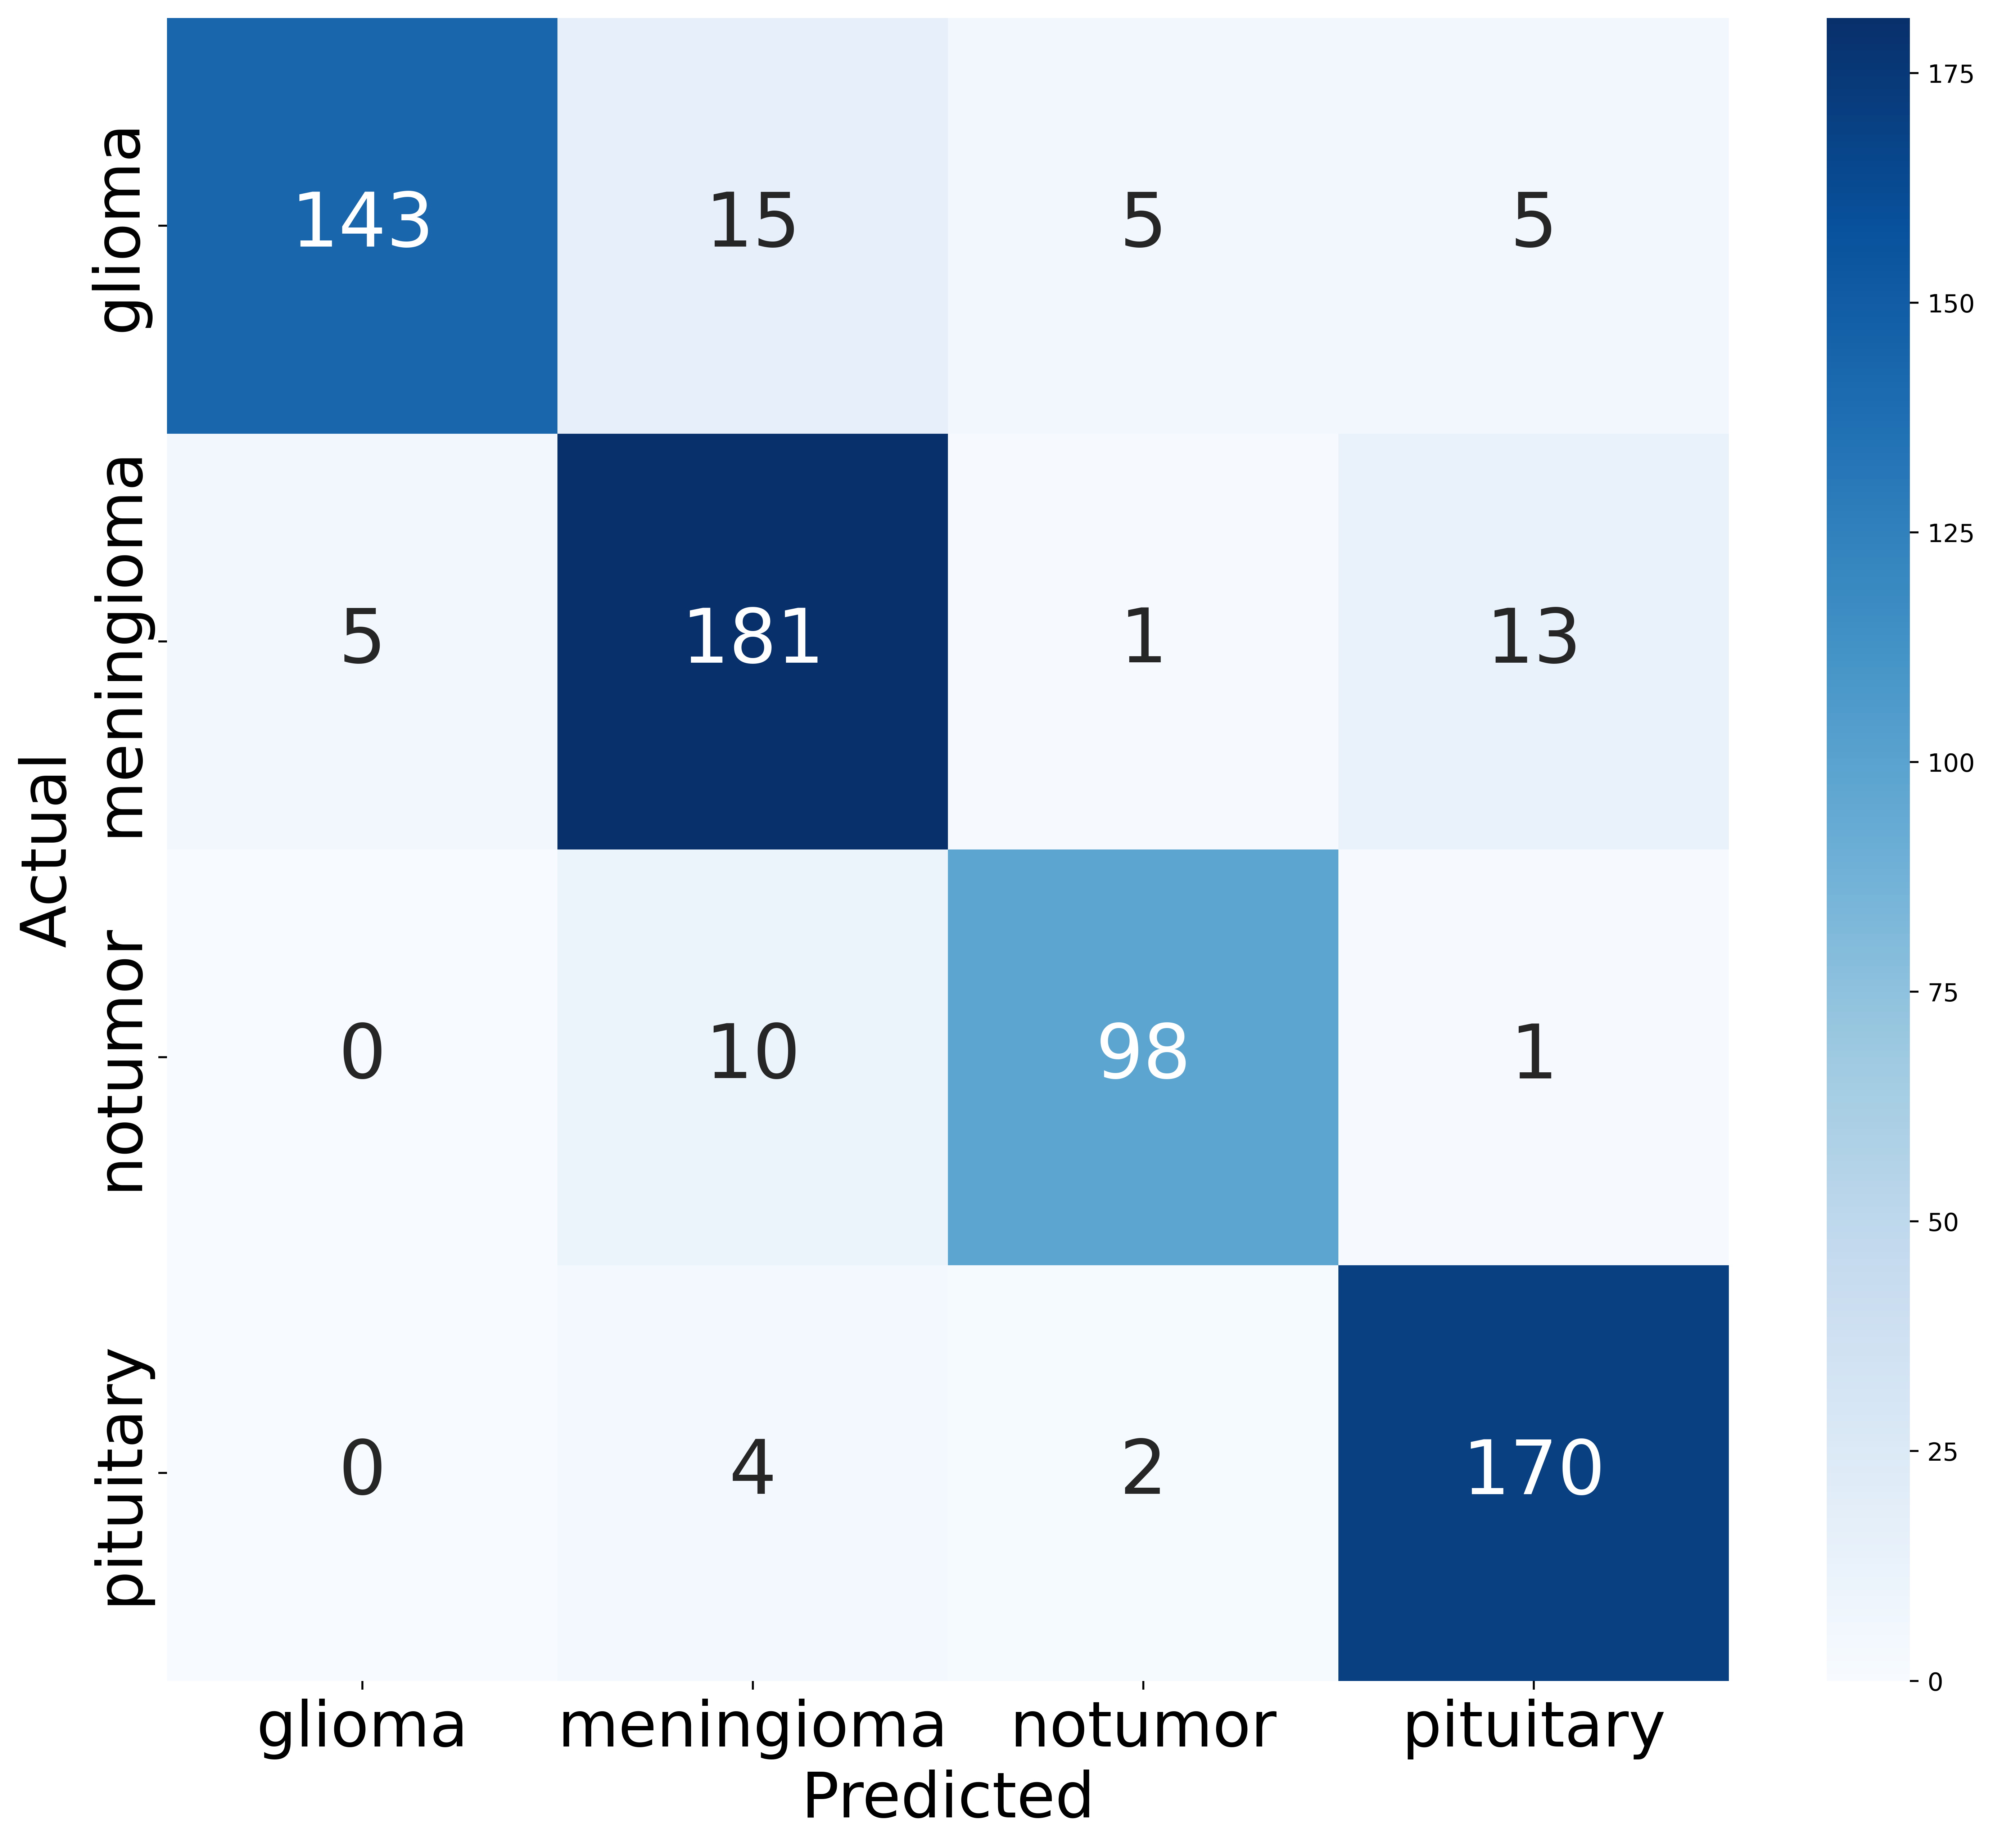

In [1]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[143 , 15, 5,  5],
                              [ 5, 181, 1, 13],
                              [ 0, 10, 98, 1],
                              [  0, 4, 2, 170]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 30})

# Increase label font size
plt.xticks(fontsize=25)
plt.yticks(fontsize=25) 
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Actual', fontsize = 25)
plt.show()

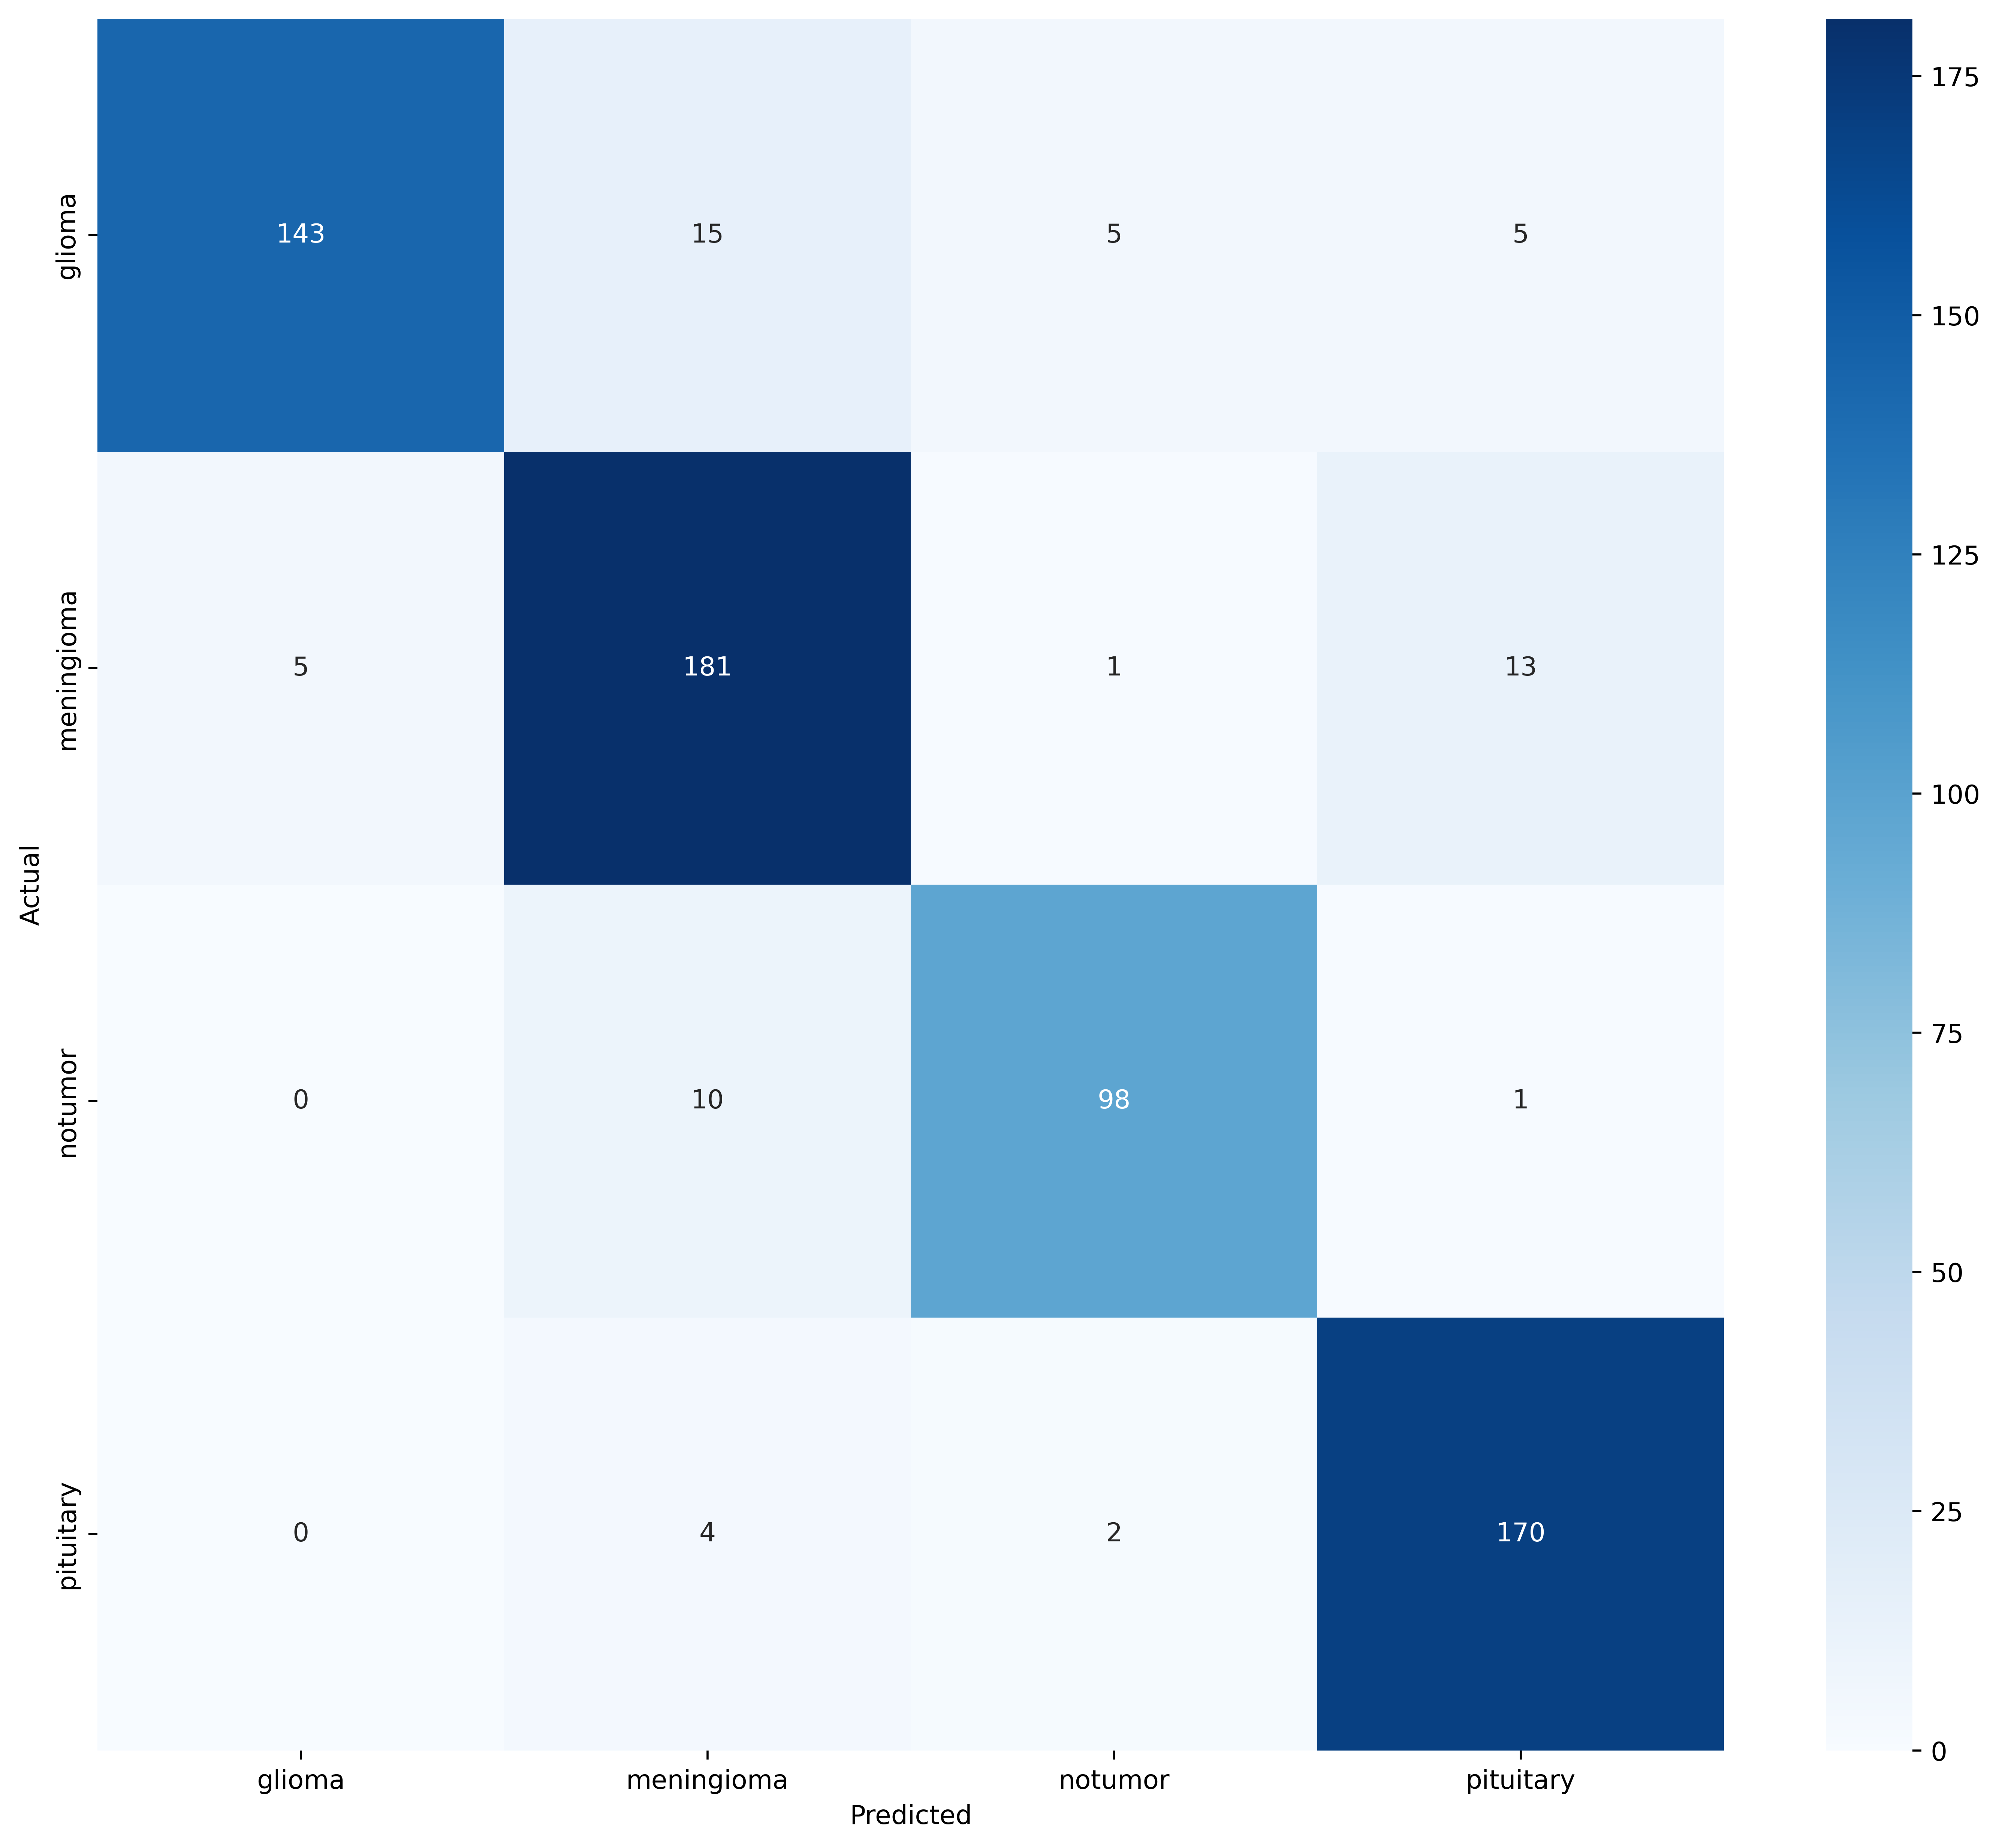

In [18]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[143 , 15, 5,  5],
                              [ 5, 181, 1, 13],
                              [ 0, 10, 98, 1],
                              [  0, 4, 2, 170]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

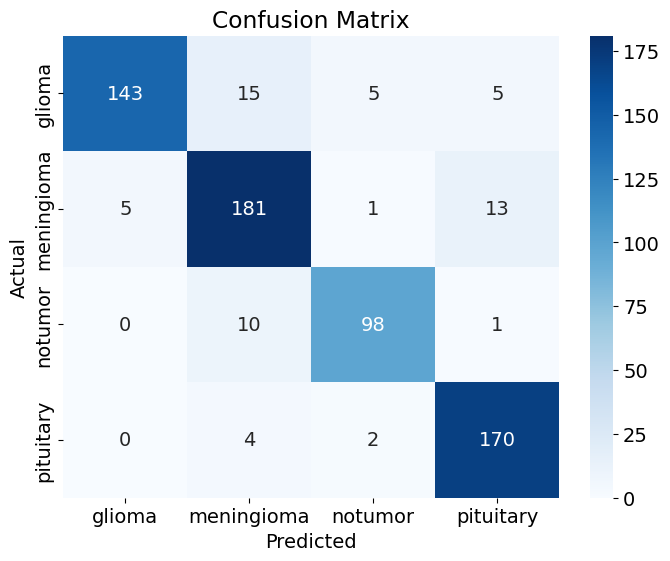

In [31]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## -------------------------------------------------------------------

In [32]:
starting_time = time.time()   

logistic_regression_classifier = LogisticRegression(multi_class="multinomial", max_iter=10000)  
logistic_regression_classifier.fit(X_train_normalized, y_train)   

#Evaluate LR classifier
accuracy_LR = logistic_regression_classifier.score(X_test_normalized, y_test)
print("Accuracy of LR:", accuracy_LR)  

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of LR: 0.7840735068912711
Total runtime of model: 0.8186078866322836 Min.


In [33]:
# Predict the labels for the test set
y_pred = logistic_regression_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.70      0.74      0.72       168
  meningioma       0.73      0.76      0.74       200
     notumor       0.86      0.68      0.76       109
   pituitary       0.90      0.93      0.91       176

    accuracy                           0.78       653
   macro avg       0.80      0.77      0.78       653
weighted avg       0.79      0.78      0.78       653



In [34]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[124  30  10   4]
 [ 41 151   2   6]
 [  8  19  74   8]
 [  5   8   0 163]]


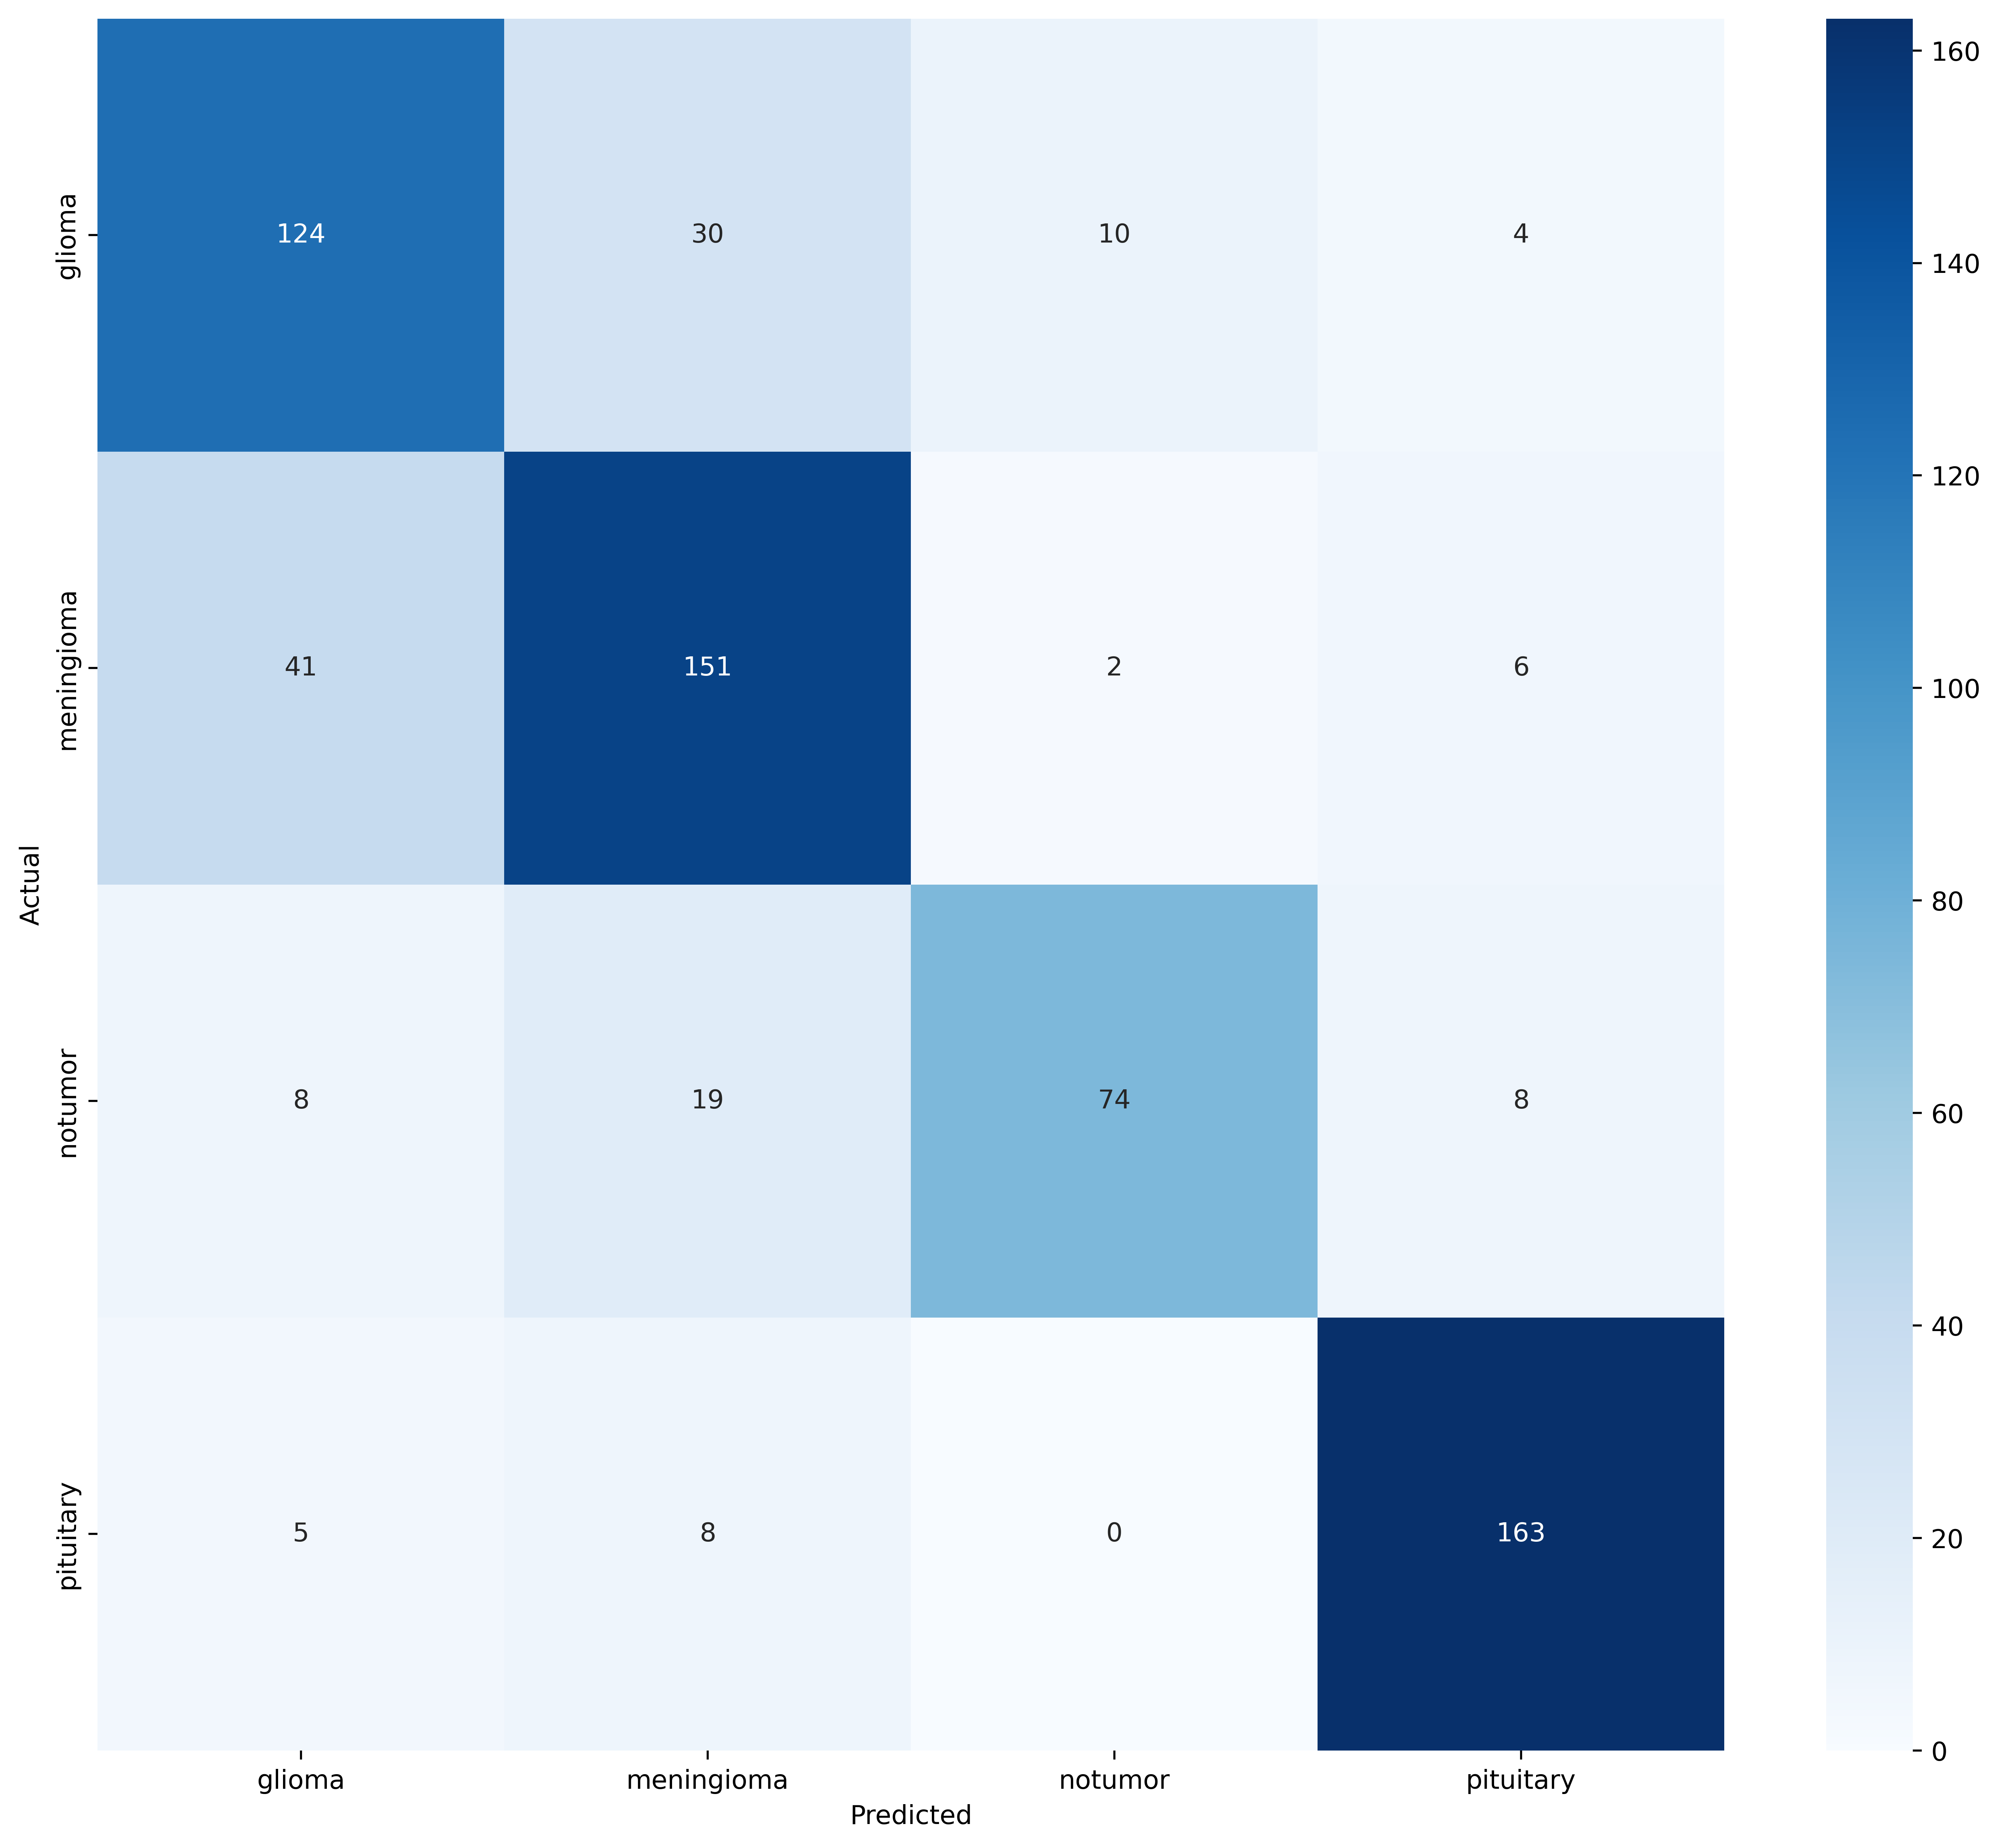

In [19]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[124 , 30, 10,  4],
                              [ 41, 151, 2, 6],
                              [ 8, 19, 74, 8],
                              [  5, 8, 0, 163]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

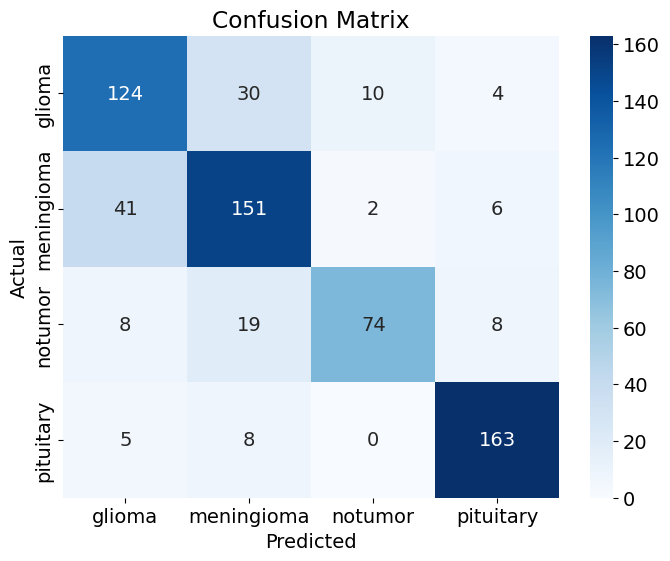

In [35]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ------------------------------------------------------------

In [36]:
starting_time = time.time()   

knn_classifier = KNeighborsClassifier(n_neighbors=4)  
knn_classifier.fit(X_train_normalized, y_train)

# Evaluate KNN classifier
accuracy_KNN = knn_classifier.score(X_test_normalized, y_test)
print("Accuracy of KNN:", accuracy_KNN) 

ending_time = time.time()  

total_run_time = ending_time - starting_time
print("Total runtime of model:", total_run_time/60, "Min.") 

Accuracy of KNN: 0.7871362940275651
Total runtime of model: 0.09115651845932007 Min.


In [37]:
# Predict the labels for the test set
y_pred = knn_classifier.predict(X_test_normalized)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.67      0.92      0.78       168
  meningioma       0.90      0.64      0.75       200
     notumor       0.76      0.64      0.70       109
   pituitary       0.86      0.92      0.89       176

    accuracy                           0.79       653
   macro avg       0.80      0.78      0.78       653
weighted avg       0.81      0.79      0.78       653



In [38]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix for SVM/Sigmoid:")
print(cm)

Confusion Matrix for SVM/Sigmoid:
[[154   7   4   3]
 [ 47 128  13  12]
 [ 21   6  70  12]
 [  7   2   5 162]]


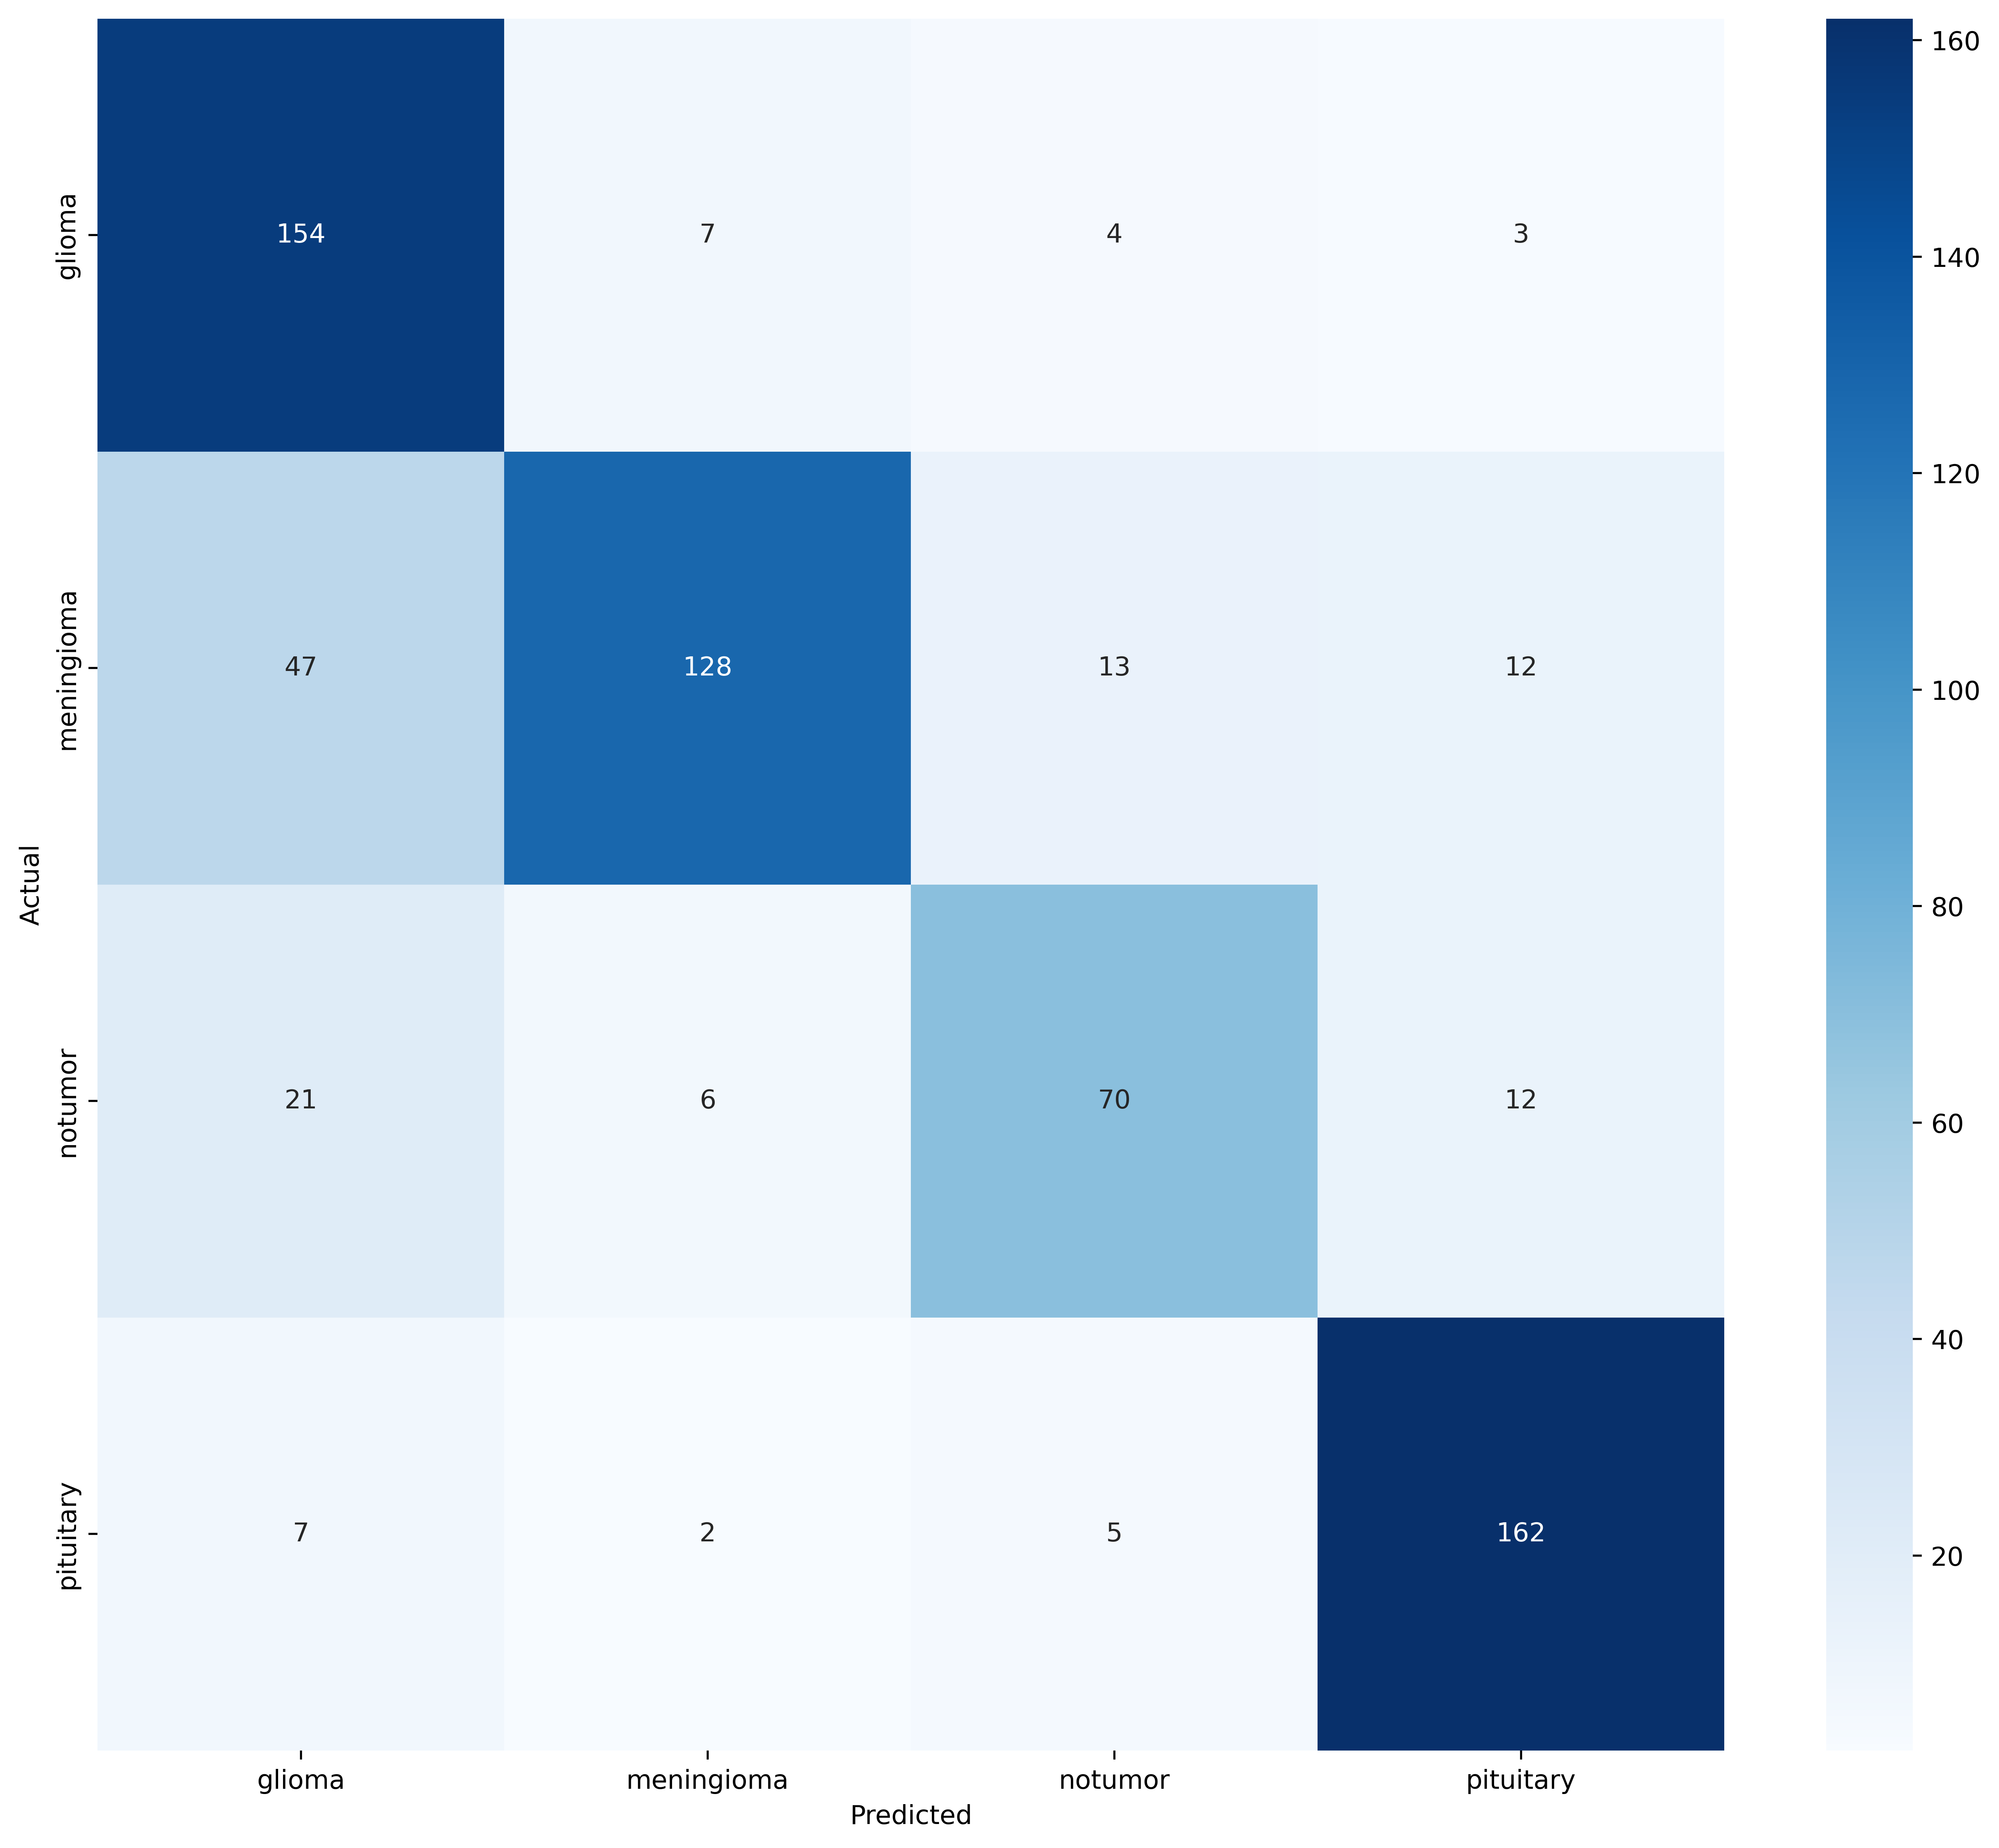

In [20]:
# Define class labels
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Define the confusion matrix data
confusion_matrix = np.array([[154 , 7, 4,  3],
                              [ 47, 128, 13, 12],
                              [ 21, 6, 70, 12],
                              [  7, 2, 5, 162]])

# Plot confusion matrix
plt.figure(figsize=(14, 12), dpi=500)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

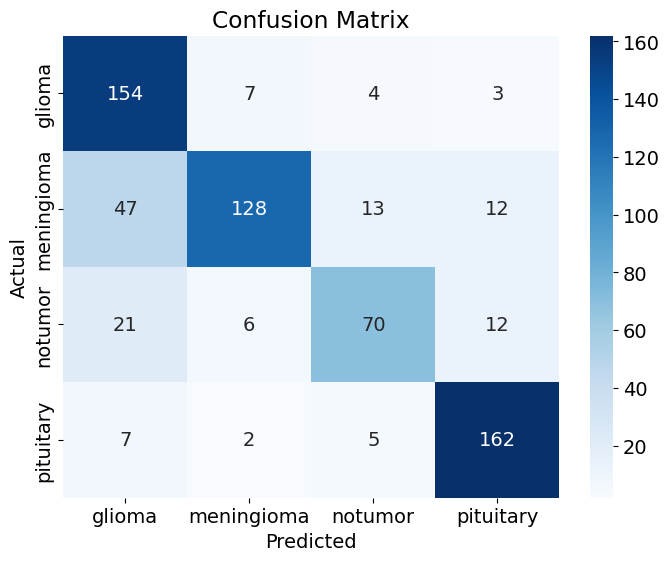

In [39]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()